# TicTacToe Data Set Classifier - Breeder Model

In [1]:
from TicTacToe import load_tic_tac_toe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import GeneticProgram as gp

### Import Iris Data Set

In [3]:
# Data set
X, y = load_tic_tac_toe()

# Split the training set
train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=True, test_size=0.20)

In [4]:
def breederDisplayCallback(string):
    clear_output(wait=True)
    display(string)

In [5]:
template_program = gp.Program(
     max_initial_instructions = 64,
     num_registers            = 8,
     num_inputs               = 4,
     mutation_rate            = 0.1,
     max_num_instructions     = 1024,
     num_classes              = 2
)

### Gap Percent of 30%

In [6]:
programs_30       = []
history_30        = []
best_accuracy_30  = 0.0
best_performer_30 = None
for i in range(3):
    p, h = gp.breederSelection(population_size     = 200,
                               template_program    = template_program,
                               halting_fitness     = 200.0,
                               max_num_generations = 200,
                               gap_percent         = 0.3,
                               X                   = train_X,
                               y                   = train_y,
                               display_fun         = breederDisplayCallback)
    
    train_acc = p.accuracy(train_X, train_y)
    test_acc  = p.accuracy(test_X, test_y)
    
    h['train_acc'] = train_acc
    h['test_acc']  = test_acc
    
    programs_30.append(p)
    history_30.append(h)
    
    if train_acc > best_accuracy_30 or best_performer_30 == None:
        best_accuracy_30  = train_acc
        best_performer_30 = i

'Round 199 - Error 462.2706274480955'

In [7]:
history_30[best_performer_30]['train_acc']

0.7245430809399478

In [8]:
history_30[best_performer_30]['test_acc']

0.671875

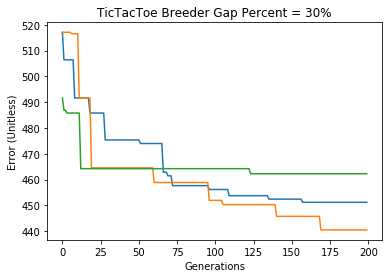

In [23]:
for i in range(3):
    error = history_30[i]['error']
    plt.plot(error)
plt.xlabel("Generations")
plt.ylabel("Error (Unitless)")
plt.title("TicTacToe Breeder Gap Percent = 30%")
plt.show()

### Gap Percent of 70%

In [10]:
programs_70       = []
history_70        = []
best_accuracy_70  = 0.0
best_performer_70 = None
for i in range(3):
    p, h = gp.breederSelection(population_size     = 200,
                               template_program    = template_program,
                               halting_fitness     = 200.0,
                               max_num_generations = 200,
                               gap_percent         = 0.7,
                               X                   = train_X,
                               y                   = train_y,
                               display_fun         = breederDisplayCallback)
    
    train_acc = p.accuracy(train_X, train_y)
    test_acc  = p.accuracy(test_X, test_y)
    
    h['train_acc'] = train_acc
    h['test_acc']  = test_acc
    
    programs_70.append(p)
    history_70.append(h)
    
    if train_acc > best_accuracy_70 or best_performer_70 == None:
        best_accuracy_70  = train_acc
        best_performer_70 = i

'Round 199 - Error 432.2543726931633'

In [11]:
history_70[best_performer_70]['train_acc']

0.7219321148825065

In [12]:
history_70[best_performer_70]['test_acc']

0.6666666666666666

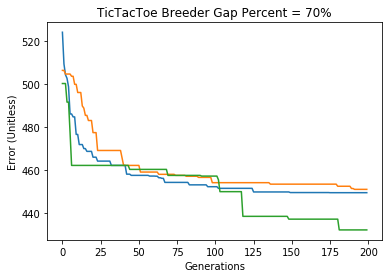

In [24]:
for i in range(3):
    error = history_70[i]['error']
    plt.plot(error)
plt.xlabel("Generations")
plt.ylabel("Error (Unitless)")
plt.title("TicTacToe Breeder Gap Percent = 70%")
plt.show()

### Compare Gap Percent on Convergence

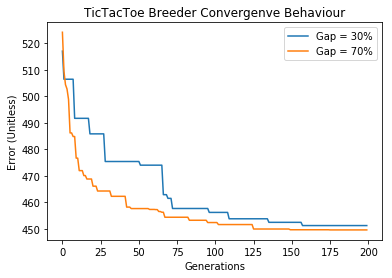

In [21]:
error_30 = history_30[best_performer_30]['error']
error_70 = history_70[best_performer_70]['error']

plt.plot(error_30)
plt.plot(error_70)
plt.xlabel("Generations")
plt.ylabel("Error (Unitless)")
plt.legend([
    'Gap = 30%',
    'Gap = 70%'
])
plt.title("TicTacToe Breeder Convergenve Behaviour")
plt.show()